## Observations and Insights 

1. One of the most promising treatment throughout the course of study is Capomulin. It shows that treatment which is done by Capomulin lowers the tumor volume. 
2.Ramicane is the second most used treatment. 
3.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, on ="Mouse ID", how ="inner")
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice in the DataFrame.
combine_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data= combine_data[combine_data[['Mouse ID', 'Timepoint' ]].duplicated(subset=None, keep=False)]
duplicate_data.head(10)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data= combine_data[combine_data[['Mouse ID']].duplicated(subset=None, keep=False)]
duplicate_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data.drop_duplicates(subset ="Mouse ID", 
                     keep = 'first', inplace = False)
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.

number_mice = clean_data['Mouse ID'].count()
number_mice

249

## Summary Statistics

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#creating summary dataframe and cleaner formate
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df.style.format("{:,.2f}")

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

Text(0, 0.5, 'Number of Data Points')

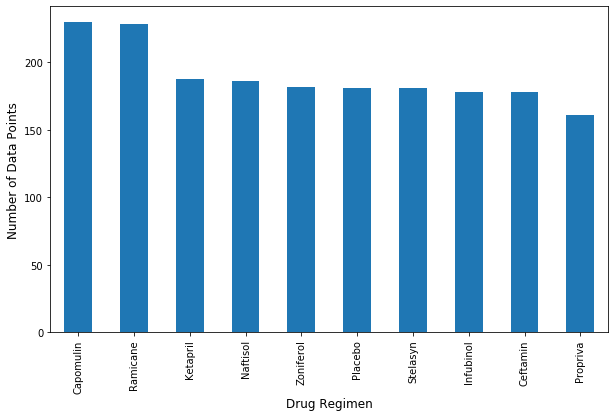

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
#counts the value of column drug regimen
counts =combine_data['Drug Regimen'].value_counts()
#plotting bar graph 
plotbar = counts.plot(kind = 'bar', figsize = (10,6))
plotbar.set_alpha(0.8)
#setting labels
plotbar.set_xlabel("Drug Regimen", fontsize = 12)
plotbar.set_ylabel("Number of Data Points", fontsize = 12)

Text(0, 0.5, 'No of data points')

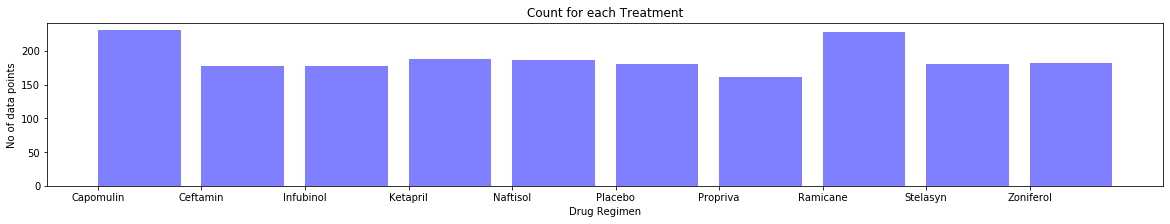

In [39]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#selecting two column and grouping 
bar_plot =pd.DataFrame(combine_data.groupby('Drug Regimen')['Mouse ID'].count())

plt.figure(figsize=(20,3))
#plotting bar chart
plt.bar(bar_plot.index.tolist(), bar_plot['Mouse ID'], color='b', alpha=0.5, align="edge")

#setting lable and title
plt.title("Count for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("No of data points")

## Pie Plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#creating dataframe and counting the value
gender_pie_df =pd.DataFrame(clean_data.groupby(["Sex"]).count()).reset_index()
gender_pie_df = gender_pie_df[["Sex", "Mouse ID"]]
#rename column
gender_pie_df =gender_pie_df.rename(columns = {"Mouse ID": "Count"})
#plotting piechart
ax1 = plt.subplot()
gender_pie_df.plot(kind = 'pie', y = "Count", figsize = (10,6), ax = ax1, startangle=180, autopct='%1.1f%%',
                      labels=gender_pie_df["Sex"], legend = False, fontsize=10)

gender_pie_df

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#creating dataframe and using groupby to print value
gender_df =pd.DataFrame(clean_data.groupby(["Sex"])["Mouse ID"].count())

#creating labels , colors and explode
labels = ["Female", "Male"]
colors = ["Blue", "Orange"]
explode = (0.1, 0)

#plotting pie chart
plt.pie(gender_df, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%",startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

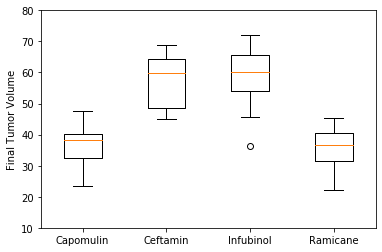

In [69]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#selecting 3 columns
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

max_tumor =combine_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
#taking last value
max_tumor = max_tumor.groupby(['Drug Regimen','Mouse ID']).last()
tumor_list = max_tumor.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
#creating dataframe 
tumor_list_df = pd.DataFrame(tumor_list)
#finding multiple data from columns
tumor_list_df = tumor_list_df[tumor_list_df.index.isin([ "Capomulin", "Ramicane", "Infubinol" , "Ceftamin"])]

tumor_list = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot( tumor_list, labels=tumor_list_df.index.tolist())

#creating labels 
plt.ylabel('Final Tumor Volume')
plt.ylim(10, 80)
plt.show()




In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [80]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tumor_list['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

TypeError: list indices must be integers or slices, not str

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse I509')

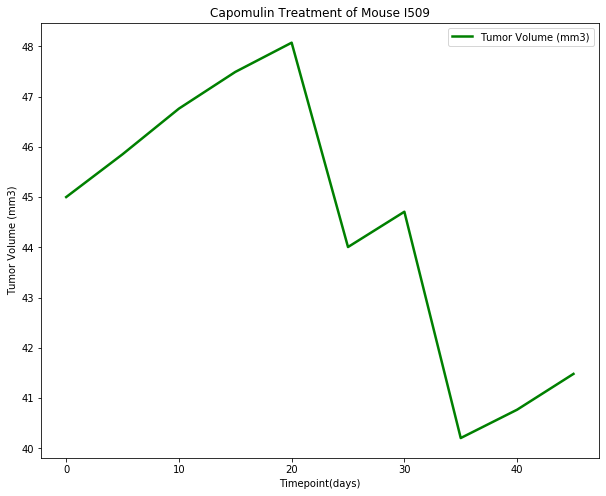

In [90]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = combine_data.loc[combine_data["Drug Regimen"] ==  "Capomulin"]
mouse_df = line_df.loc[line_df["Mouse ID"]== "l509"]
mouse_df = mouse_df[["Timepoint", "Tumor Volume (mm3)"]]
mouse_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse I509')

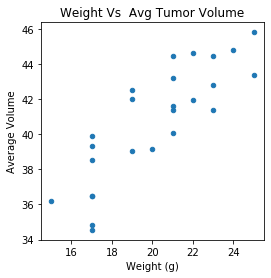

In [91]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
line_df= line_df[["Weight (g)", "Tumor Volume (mm3)", "Mouse ID"]]
scatter_df  = pd.DataFrame(line_df.groupby(["Mouse ID"]).mean())
scatter_df = scatter_df.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
scatter_df.plot(kind="scatter", x="Weight (g)", y="Average Volume", figsize=(4,4),
             title="Weight Vs  Avg Tumor Volume")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight =scatter_df.iloc[:,0]
average_tumor =scatter_df.iloc[:,1]
correlation = st.pearsonr(mouse_weight,average_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

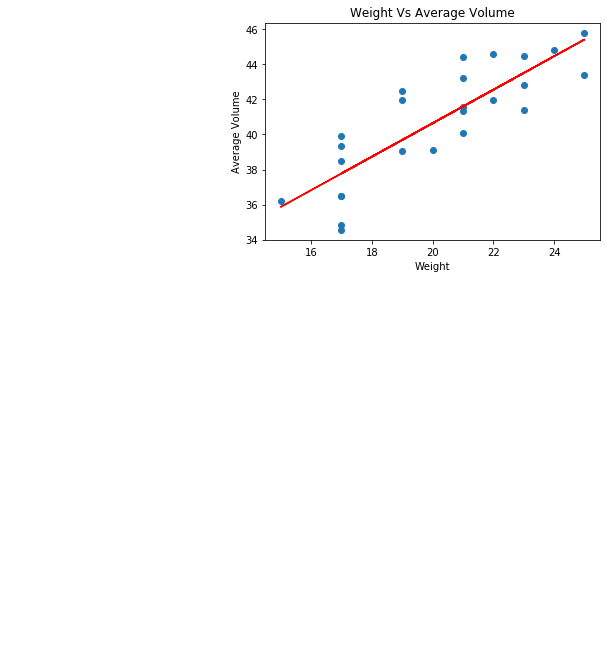

In [94]:

x_values = scatter_df['Weight (g)']
y_values = scatter_df['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Weight Vs Average Volume")
plt.xlabel('Weight')
plt.ylabel('Average Volume')
plt.show()